<a href="https://colab.research.google.com/github/Poojashrees3/NLP/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Section A: Data Analysis & Preprocessing**

**Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from wordcloud import WordCloud
from collections import Counter

**Loading Dataset**

In [ ]:
train_df = pd.read_csv("/content/Exam/train.csv")
print("Train data shape:", train_df.shape)

**Class Distribution Analysis**

1.Number of Examples per Class

In [ ]:
label_counts = train_df["Labels"].value_counts().sort_index()
print("Number of examples per class:\n", label_counts)

Number of examples per class:
 Labels
1     53
2    133
3     19
4    101
5     82
6     31
7    130
8     22
Name: count, dtype: int64


2.Total Number of Unique Labels

In [ ]:
unique_labels = train_df["Labels"].nunique()
print("\nTotal number of unique labels:", unique_labels)


Total number of unique labels: 8


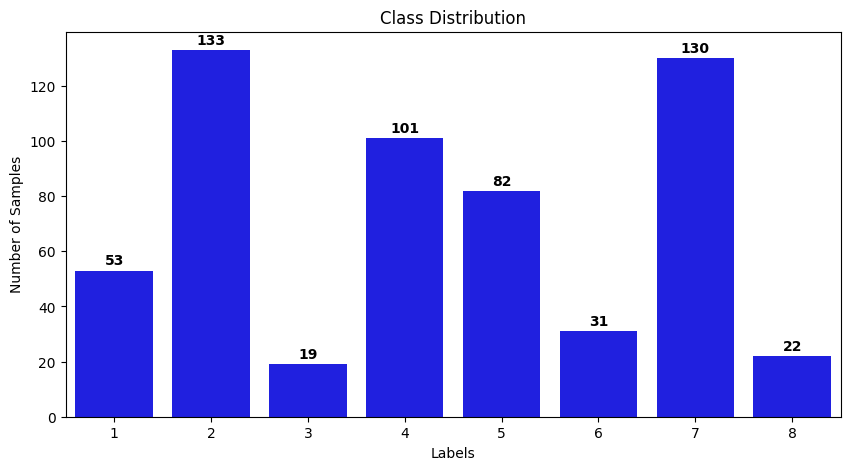

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=label_counts.index, y=label_counts.values, color='blue')
plt.title("Class Distribution")
plt.xlabel("Labels")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)

for i, v in enumerate(label_counts.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

plt.show()

**Cleaning the data**

In [ ]:
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    doc = nlp(str(text).lower())  # Lowercase and tokenize
    return [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

train_df["tokens"] = train_df["Interview Text"].apply(preprocess_text)

print(train_df[["Interview Text", "tokens"]].head())


                                      Interview Text  \
0   I don't know, I can't really think of anythin...   
1   No, and don't tell me what is going on. I don...   
2    Yeah, I think I'm always pretty good no matt...   
3  I was going to say, Marcus over here was in th...   
4   Obviously today was more of a grind than last...   

                                              tokens  
0  [know, think, play, little, golf, produce, bab...  
1                               [tell, go, tell, go]  
2  [yeah, think, pretty, good, matter, fan, talk,...  
3  [go, marcu, final, mvp, american, league, sit,...  
4  [obviously, today, grind, thursday, see, good,...  


Plotting distribution for each class

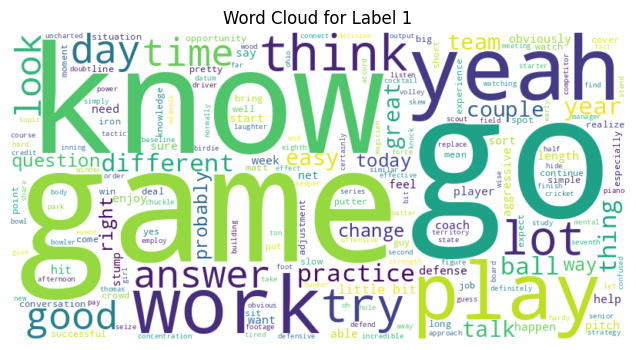

<ipython-input-7-e51330978e24>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette="viridis")


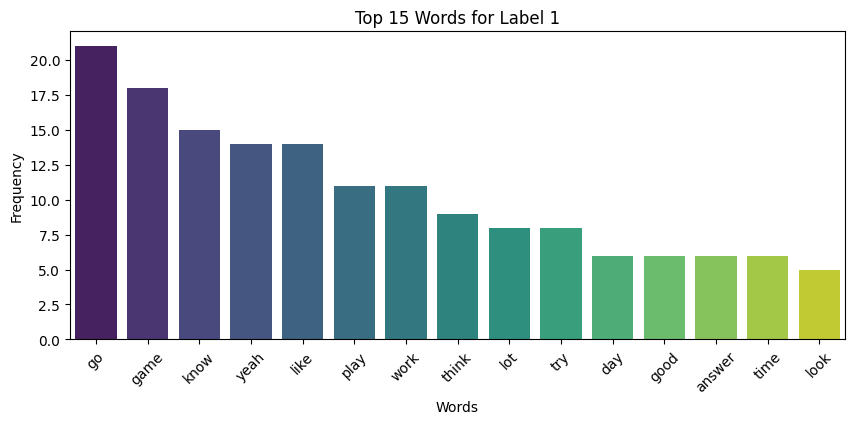

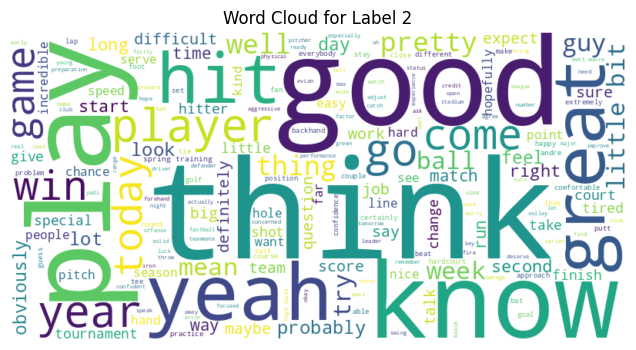

<ipython-input-7-e51330978e24>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette="viridis")


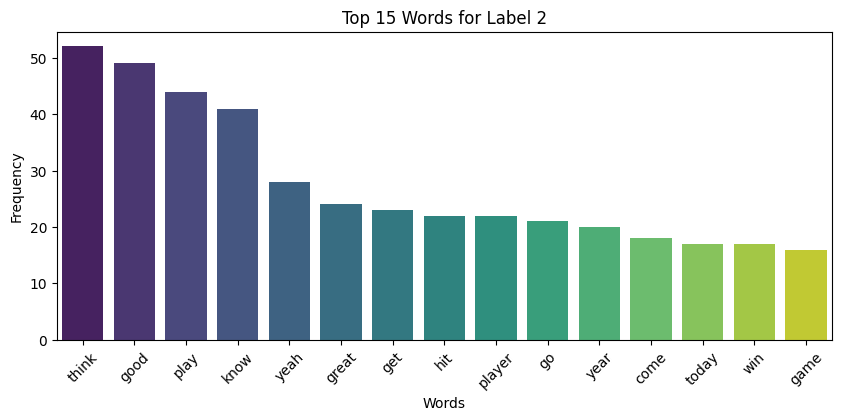

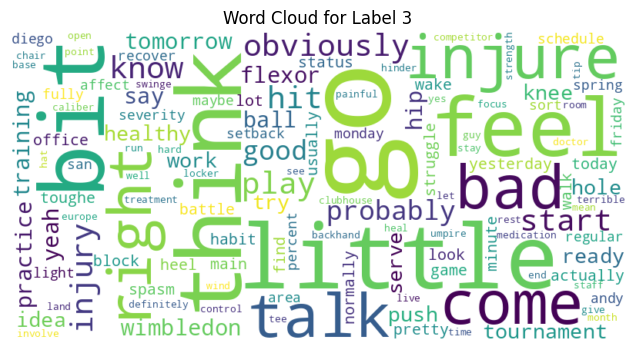

<ipython-input-7-e51330978e24>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette="viridis")


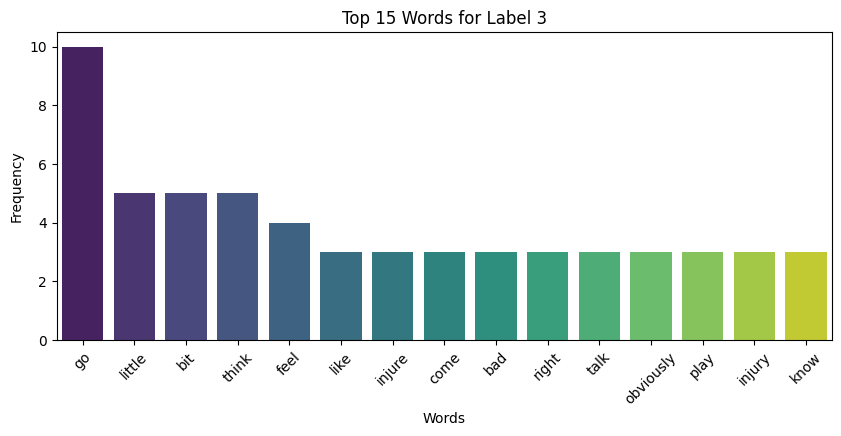

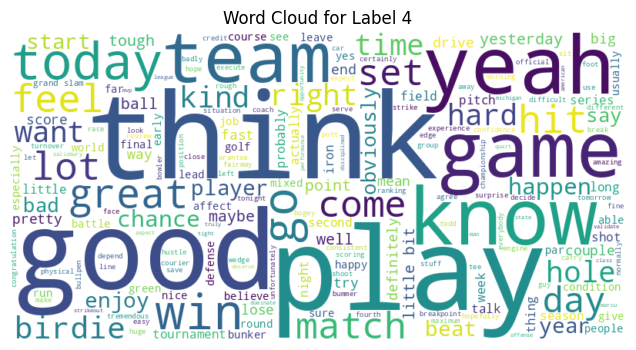

<ipython-input-7-e51330978e24>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette="viridis")


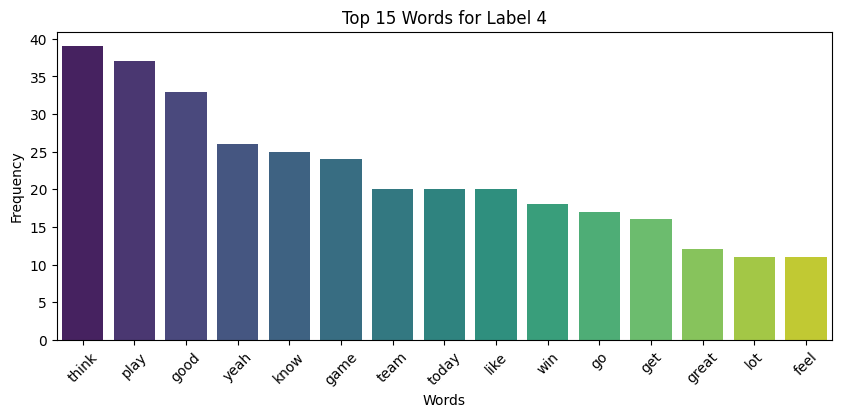

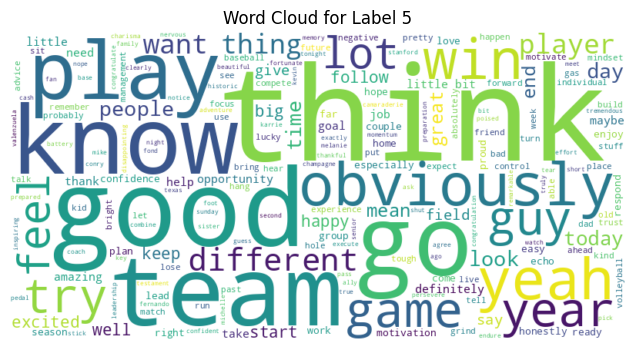

<ipython-input-7-e51330978e24>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette="viridis")


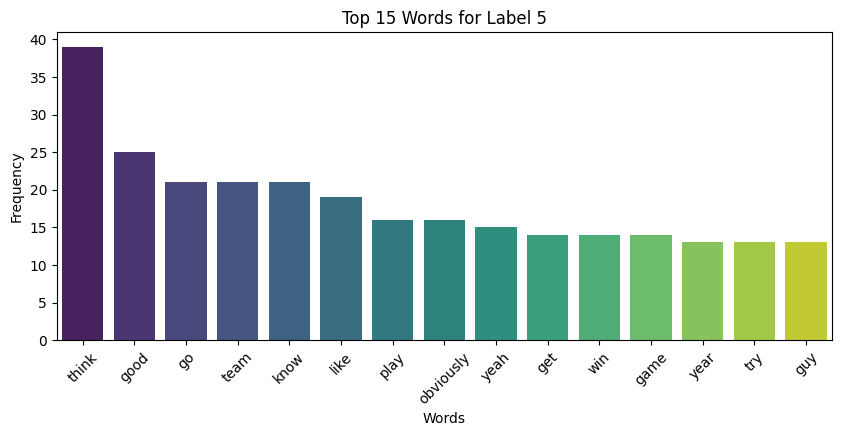

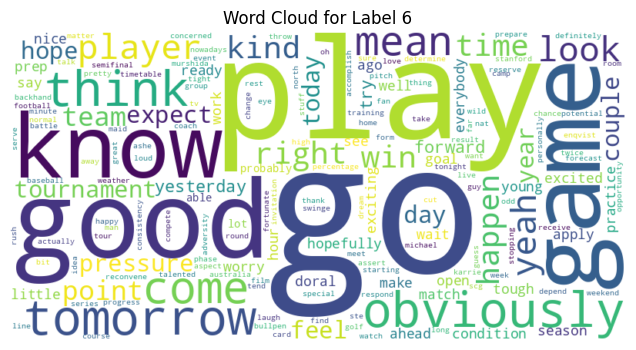

<ipython-input-7-e51330978e24>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette="viridis")


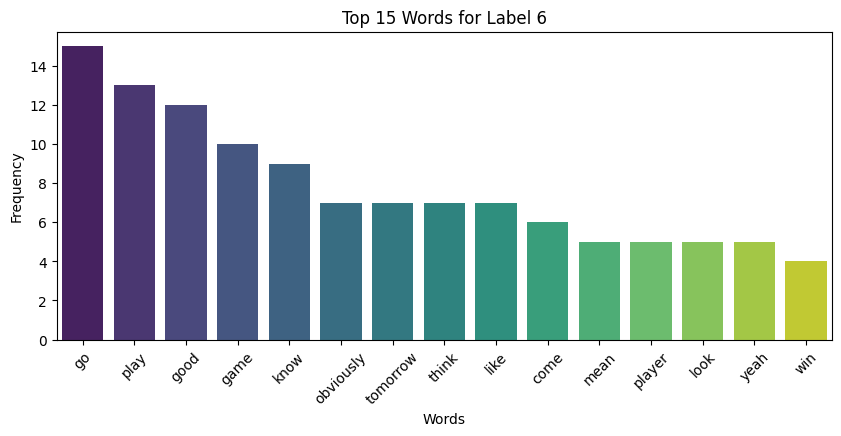

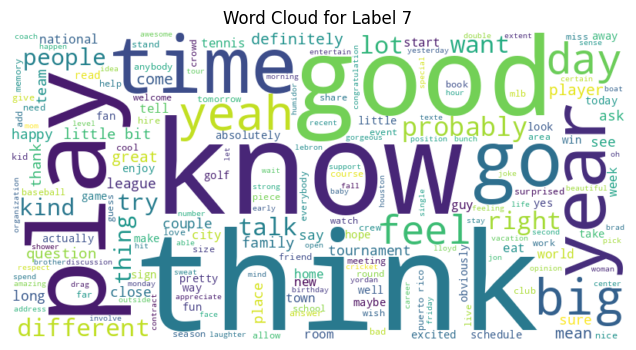

<ipython-input-7-e51330978e24>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette="viridis")


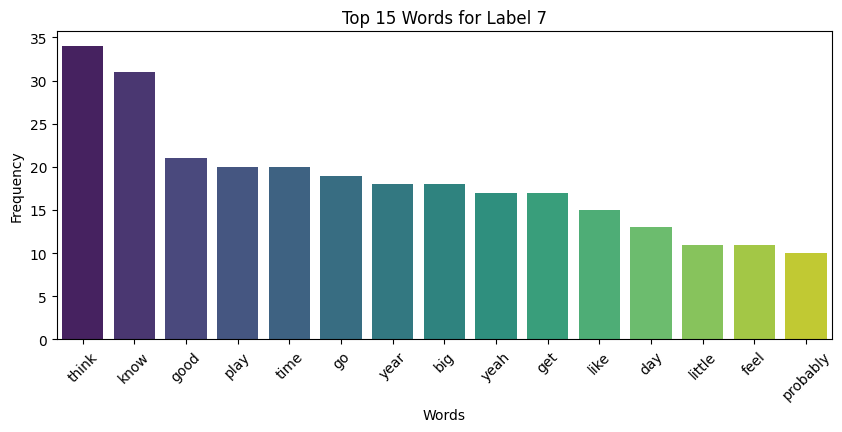

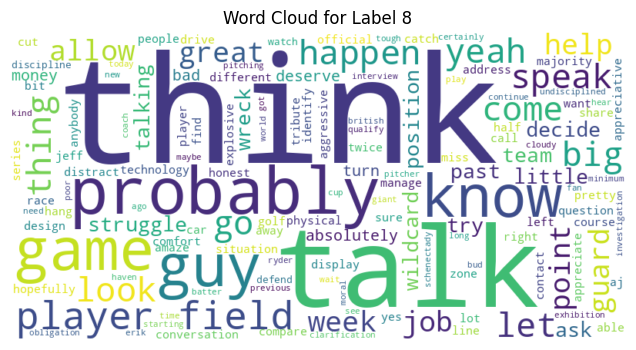

<ipython-input-7-e51330978e24>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette="viridis")


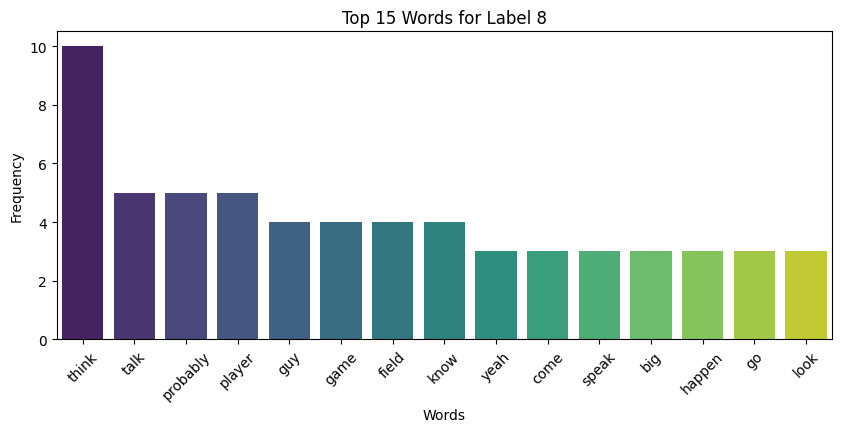

In [ ]:
for label in sorted(train_df["Labels"].unique()):
    all_words = train_df[train_df["Labels"] == label]["tokens"].sum()

    # Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_words))
    plt.figure(figsize=(10, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Label {label}")
    plt.show()

    # Token Frequency Bar Plot
    word_freq = Counter(all_words).most_common(15)
    words, freqs = zip(*word_freq)

    plt.figure(figsize=(10, 4))
    sns.barplot(x=list(words), y=list(freqs), palette="viridis")
    plt.title(f"Top 15 Words for Label {label}")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

**Section B: Model Development and Evaluation**

1.Logistic Regression model with TF-IDF features

**Loading datasets**

In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/Exam/train.csv')
test_df = pd.read_csv('/content/Exam/test.csv')
ground_truth_df = pd.read_csv('/content/Exam/val.csv')

train_df.head(), test_df.head(), ground_truth_df.head()


(   ID    Sports                                     Interview Text  \
 0   1    Tennis   I don't know, I can't really think of anythin...   
 1   2    Tennis   No, and don't tell me what is going on. I don...   
 2   3      Golf    Yeah, I think I'm always pretty good no matt...   
 3   4  Baseball  I was going to say, Marcus over here was in th...   
 4   5      Golf   Obviously today was more of a grind than last...   
 
              Speaker        Type  Labels  
 0      MATS WILANDER  Individual       7  
 1        JIM COURIER  Individual       7  
 2  PERNILLA LINDBERG  Individual       2  
 3    HAROLD REYNOLDS        Team       4  
 4         DAVID TOMS  Individual       2  ,
     ID    Sports                                     Interview Text  \
 0  817  Baseball    If you ask him, he would get an out or two o...   
 1  818    Hockey  At this point in time we're letting the dust s...   
 2  819      Golf   I hit a 6-iron there.  Then I hit it in there...   
 3  820  Baseball  

**Preprocessing the text data and Extracting TF-IDF Features**

In [ ]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    doc = nlp(str(text).lower())  # Lowercase and tokenize
    # Reduce the restrictiveness of preprocessing
    return [token.lemma_ for token in doc if token.is_alpha] # Removed the stop word filtering


train_df["cleaned_text"] = train_df["Interview Text"].apply(preprocess_text)
train_df['cleaned_text'] = train_df['cleaned_text'].apply(lambda tokens: ' '.join(tokens))

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(train_df['cleaned_text'])

**Training Logistic Regression model**

In [ ]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_tfidf, train_df['Labels']) # Changed 'label' to 'Labels'

# 🔮 Predict on test set (Do not clean the test data)
X_test_tfidf = vectorizer.transform(test_df['Interview Text'])  # Use raw test text for prediction, changed 'text' to 'Interview Text'
y_pred = logreg_model.predict(X_test_tfidf)

# 📊 Debugging: Check the contents of ground_truth_df
print(ground_truth_df.head())  # Check first few rows of ground truth
print("Number of samples in ground truth:", len(ground_truth_df))

# Ensure the number of samples in ground truth matches y_pred
assert len(test_df) == len(y_pred), "Mismatch between test set and predictions."
assert len(ground_truth_df) >= len(y_pred), "Mismatch between ground truth and predictions."

# Slice ground truth to match the number of predictions
ground_truth_df = ground_truth_df.iloc[:len(y_pred)]

# Now evaluate using the correct length ground truth
accuracy = accuracy_score(ground_truth_df['Labels'], y_pred)
weighted_f1 = f1_score(ground_truth_df['Labels'], y_pred, average='weighted')
conf_matrix = confusion_matrix(ground_truth_df['Labels'], y_pred)

print("✅ Accuracy:", accuracy)
print("✅ Weighted F1 Score:", weighted_f1)
print("✅ Confusion Matrix:\n", conf_matrix)


    ID    Sports                                     Interview Text  \
0  572  Baseball    Well, it means that Joe has enough confidenc...   
1  573    Tennis   It is sore.  Just ice it, do my treatment and...   
2  574  Lacrosse  You know, it's something we have been trying t...   
3  575      Golf   Well, I had in the tournament before that in ...   
4  576    Tennis    No, I am taking one them match at a time.  I...   

         Speaker        Type  Labels  
0   MIKE MUSSINA        Team       5  
1  THOMAS MUSTER  Individual       3  
2      ANDY SHAY        Team       7  
3    KARRIE WEBB  Individual       2  
4  HELENA SUKOVA  Individual       4  
Number of samples in ground truth: 72
✅ Accuracy: 0.08333333333333333
✅ Weighted F1 Score: 0.07891920244398608
✅ Confusion Matrix:
 [[ 0  0  0  3  3  0  1  0]
 [ 0  3  0  4  2  0 10  0]
 [ 0  1  0  0  0  0  2  0]
 [ 0  5  0  2  1  0  8  0]
 [ 0  2  0  2  0  0  1  0]
 [ 0  1  0  0  0  0  3  0]
 [ 0  4  0  3  3  0  1  0]
 [ 0  2  0  1  0  

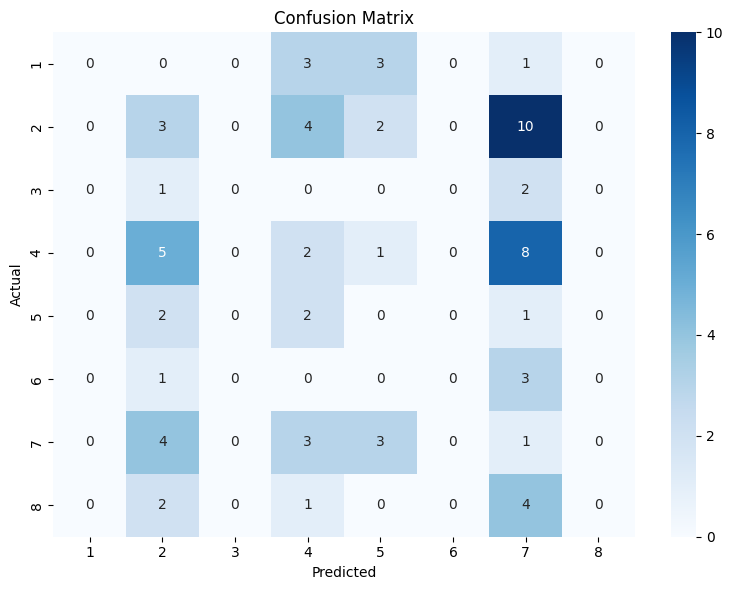

In [ ]:
# 🖼️ Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=logreg_model.classes_, yticklabels=logreg_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

**2.BERT Model**

In [ ]:
pip install transformers datasets scikit-learn torch matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install numpy --upgrade
!pip install jaxlib jax --upgrade

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.10.1 requires numpy<1.27.0,>=1.19.5, but you have numpy 2.2.5 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
cvxpy 1.6.5 requires sc

In [ ]:
import pandas as pd
from datasets import Dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import torch

/usr/local/lib/python3.11/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.5.1 is installed, but it is not compatible with the installed jaxlib version 0.6.0, so it will not be used.
  warnings.warn(


In [ ]:

# Load your training and validation datasets
train_df = pd.read_csv('/content/Exam/train.csv')
val_df = pd.read_csv('/content/Exam/val.csv')
test_df = pd.read_csv('/content/Exam/test.csv')


train_df = train_df.rename(columns={'Labels': 'label'})
val_df = val_df.rename(columns={'Labels': 'label'})

train_df['label'] = train_df['label'] - 1
val_df['label'] = val_df['label'] - 1

train_df['label'] = train_df['label'].astype(int)
val_df['label'] = val_df['label'].astype(int)

# Convert to HuggingFace Dataset format
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)
train_dataset, val_dataset, test_dataset

(Dataset({
     features: ['ID', 'Sports', 'Interview Text', 'Speaker', 'Type', 'label'],
     num_rows: 571
 }),
 Dataset({
     features: ['ID', 'Sports', 'Interview Text', 'Speaker', 'Type', 'label'],
     num_rows: 143
 }),
 Dataset({
     features: ['ID', 'Sports', 'Interview Text', 'Speaker', 'Type'],
     num_rows: 72
 }))

In [ ]:


# Load the pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define a function to tokenize the text data
def tokenize_function(examples):
    return tokenizer(examples['Interview Text'], padding="max_length", truncation=True,max_length=128)

# Tokenize the training and validation datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

# Set the format for PyTorch (we need labels for training/evaluation)
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
val_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# Tokenize the test dataset (only for inference later)
test_dataset = test_dataset.map(tokenize_function, batched=True)
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask'])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/571 [00:00<?, ? examples/s]

Map:   0%|          | 0/143 [00:00<?, ? examples/s]

Map:   0%|          | 0/72 [00:00<?, ? examples/s]

In [ ]:
num_labels = 8  # Now labels are 0–7
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)

# -------------------------------
# 6. Training Arguments
# -------------------------------
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy='epoch',
    save_strategy='no',
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=False,
    report_to='none'  # Set to 'wandb' if using Weights & Biases
)

# -------------------------------
# 7. Metrics
# -------------------------------
def compute_metrics(p):
    preds = p.predictions.argmax(axis=-1)
    labels = p.label_ids
    return {
        'accuracy': accuracy_score(labels, preds),
        'f1_weighted': f1_score(labels, preds, average='weighted'),
        'confusion_matrix': confusion_matrix(labels, preds)
    }

# -------------------------------
# 8. Trainer
# -------------------------------
Bert_trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# -------------------------------
# 9. Train the Model
# -------------------------------
Bert_trainer.train()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1 Weighted,Confusion Matrix
1,1.751300,1.925791,0.244755,0.167366,[[ 0 0 0 14 6 0 1 0] [ 0 4 0 27 3 0 1 0] [ 0 2 0 1 2 0 0 0] [ 0 2 0 24 2 0 0 0] [ 0 2 0 3 4 0 0 0] [ 0 1 0 7 0 0 1 0] [ 0 1 0 5 14 0 3 0] [ 0 1 0 3 8 0 1 0]]
2,1.564800,1.607296,0.426573,0.339865,[[ 0 5 0 7 2 0 7 0] [ 0 19 0 7 1 0 8 0] [ 0 0 0 0 0 0 5 0] [ 0 5 0 16 4 0 3 0] [ 0 2 0 1 3 0 3 0] [ 0 3 0 1 1 0 4 0] [ 0 0 0 0 0 0 23 0] [ 0 0 0 2 1 0 10 0]]
3,1.103600,1.711554,0.419580,0.378838,[[ 7 5 0 0 8 0 1 0] [ 0 32 0 0 3 0 0 0] [ 0 1 3 0 0 0 1 0] [ 1 13 0 4 10 0 0 0] [ 0 3 0 0 5 0 1 0] [ 1 3 0 0 3 0 2 0] [ 2 3 0 0 9 0 9 0] [ 1 5 0 0 4 0 3 0]]
4,0.483000,1.687614,0.461538,0.446650,[[12 1 0 0 4 0 4 0] [ 3 17 0 7 3 0 5 0] [ 0 0 5 0 0 0 0 0] [ 6 3 0 11 7 0 1 0] [ 2 1 0 0 4 0 2 0] [ 2 1 0 0 2 1 3 0] [ 3 0 1 0 3 0 16 0] [ 2 0 0 1 2 1 7 0]]


Epoch,Training Loss,Validation Loss,Accuracy,F1 Weighted,Confusion Matrix
1,1.751300,1.925791,0.244755,0.167366,[[ 0 0 0 14 6 0 1 0] [ 0 4 0 27 3 0 1 0] [ 0 2 0 1 2 0 0 0] [ 0 2 0 24 2 0 0 0] [ 0 2 0 3 4 0 0 0] [ 0 1 0 7 0 0 1 0] [ 0 1 0 5 14 0 3 0] [ 0 1 0 3 8 0 1 0]]
2,1.564800,1.607296,0.426573,0.339865,[[ 0 5 0 7 2 0 7 0] [ 0 19 0 7 1 0 8 0] [ 0 0 0 0 0 0 5 0] [ 0 5 0 16 4 0 3 0] [ 0 2 0 1 3 0 3 0] [ 0 3 0 1 1 0 4 0] [ 0 0 0 0 0 0 23 0] [ 0 0 0 2 1 0 10 0]]
3,1.103600,1.711554,0.419580,0.378838,[[ 7 5 0 0 8 0 1 0] [ 0 32 0 0 3 0 0 0] [ 0 1 3 0 0 0 1 0] [ 1 13 0 4 10 0 0 0] [ 0 3 0 0 5 0 1 0] [ 1 3 0 0 3 0 2 0] [ 2 3 0 0 9 0 9 0] [ 1 5 0 0 4 0 3 0]]
4,0.483000,1.687614,0.461538,0.446650,[[12 1 0 0 4 0 4 0] [ 3 17 0 7 3 0 5 0] [ 0 0 5 0 0 0 0 0] [ 6 3 0 11 7 0 1 0] [ 2 1 0 0 4 0 2 0] [ 2 1 0 0 2 1 3 0] [ 3 0 1 0 3 0 16 0] [ 2 0 0 1 2 1 7 0]]
5,0.290900,1.693799,0.454545,0.434225,[[ 9 4 0 1 3 0 4 0] [ 0 20 0 8 3 0 4 0] [ 0 0 5 0 0 0 0 0] [ 2 6 0 13 6 1 0 0] [ 1 1 0 1 5 0 1 0] [ 0 2 1 2 0 1 3 0] [ 2 1 1 2 5 0 12 0] [ 1 0 0 3 2 0 7 0]]


TrainOutput(global_step=360, training_loss=1.0885871317651536, metrics={'train_runtime': 3855.5803, 'train_samples_per_second': 0.74, 'train_steps_per_second': 0.093, 'total_flos': 187805632604160.0, 'train_loss': 1.0885871317651536, 'epoch': 5.0})

In [ ]:
# Evaluate the model on the validation set
eval_results = Bert_trainer.evaluate()

# Print evaluation metrics
print(f"Accuracy: {eval_results['eval_accuracy']}")
print(f"Weighted F1 Score: {eval_results['eval_f1_weighted']}")
print(f"Confusion Matrix: \n{eval_results['eval_confusion_matrix']}")


Accuracy: 0.45454545454545453
Weighted F1 Score: 0.4342245067337067
Confusion Matrix: 
[[ 9  4  0  1  3  0  4  0]
 [ 0 20  0  8  3  0  4  0]
 [ 0  0  5  0  0  0  0  0]
 [ 2  6  0 13  6  1  0  0]
 [ 1  1  0  1  5  0  1  0]
 [ 0  2  1  2  0  1  3  0]
 [ 2  1  1  2  5  0 12  0]
 [ 1  0  0  3  2  0  7  0]]


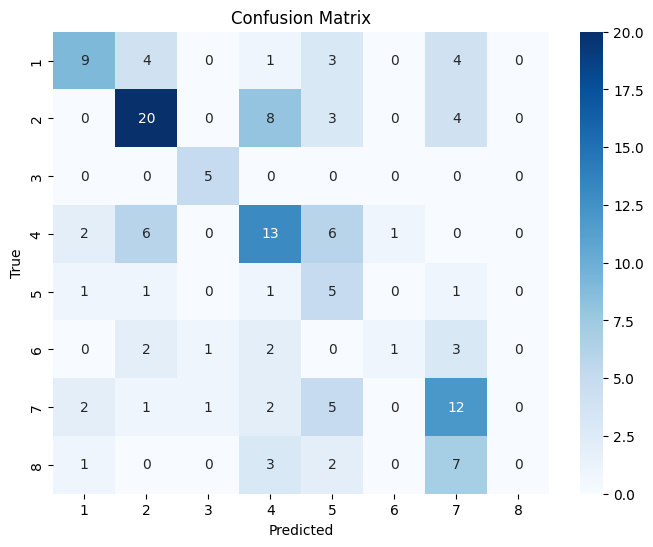

In [ ]:
# Plot confusion matrix
cm = eval_results['eval_confusion_matrix']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 9), yticklabels=range(1, 9))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model.save_pretrained("models/Bert_trainer")
tokenizer.save_pretrained("models/Bert_trainer")

('models/Bert_trainer/tokenizer_config.json',
 'models/Bert_trainer/special_tokens_map.json',
 'models/Bert_trainer/vocab.txt',
 'models/Bert_trainer/added_tokens.json')

In [ ]:

predictions = Bert_trainer.predict(test_dataset)
test_df['predicted_label'] = predictions.predictions.argmax(axis=-1) + 1  # Shift back to 1–8

# Save predictions
test_df[['Interview Text', 'predicted_label']].to_csv('submission.csv', index=False)
print("Test predictions saved to submission.csv")

Test predictions saved to submission.csv


**Section C: Text Generation**

In [ ]:
!pip install transformers -q

from transformers import pipeline, set_seed
set_seed(42)


In [ ]:
generator = pipeline('text-generation', model='gpt2')


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
def generate_response(category, question, max_length=100):
    prompt = f"{category.upper()} INTERVIEW\nQ: {question}\nA:"
    result = generator(prompt, max_length=max_length, num_return_sequences=1)
    return result[0]['generated_text'].split('A:')[-1].strip()


In [ ]:
examples = [
    ("Football", "How do you feel after scoring the winning goal?"),
    ("Tennis", "What was going through your mind in the final set?"),
    ("Boxing", "Did you expect the fight to end that quickly?"),
    ("Basketball", "How did your team stay composed in overtime?"),
    ("Cricket", "What was the strategy going into the second innings?")
]

for cat, ques in examples:
    print(f"Category: {cat}")
    print(f"Q: {ques}")
    print(f"A: {generate_response(cat, ques)}\n{'-'*50}")


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Category: Football
Q: How do you feel after scoring the winning goal?


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


A: It was easy. It was a perfect goal. You've got to know you're giving yourself a chance. We haven't seen that in so many years.
You are so dominant against this type of defense that it was hard to come into the final five minutes. We still had good, good looks.
Q: You look good in the team's jersey too with your height and your
--------------------------------------------------
Category: Tennis
Q: What was going through your mind in the final set?


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


A: That I can't tell at present. As much as I love the actors and the visuals and all the elements which make
--------------------------------------------------
Category: Boxing
Q: Did you expect the fight to end that quickly?


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


A: I believe
--------------------------------------------------
Category: Basketball
Q: How did your team stay composed in overtime?


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


A: We got off to a hot start, but our defense didn't get much of a chance. They stayed calm in the third quarter. We weren't too good against our team. But the defense did get good shots, and that's what's going to make it up until the end. But you want to make sure you're playing your smart, play smart, and just keep getting out
--------------------------------------------------
Category: Cricket
Q: What was the strategy going into the second innings?
A: The first inning, there was some time you'd be on base. When you step on the ball, you just feel it on the grass and you're in a really good position to do something. You get so comfortable with what you're doing that
--------------------------------------------------


**Section D: Visualization**

In [ ]:
!pip install spacy  pyldavis scikit-learn matplotlib pandas
!python -m spacy download en_core_web_sm
!pip uninstall -y gensim scipy numpy
!pip install numpy==1.23.5
!pip install scipy==1.10.1
!pip install gensim==4.3.1


  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 79.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Successfully uninstalled scipy-1.10.1
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x

  Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires gensim, which is not installed.
pyldavis 3.4.1 requires numpy>=1.24.2, but you have numpy 1.23.5 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
albumentations 2.0.6 requires numpy>=1.24.4, but 

In [ ]:
import spacy
import pandas as pd
import gensim
from gensim import corpora
import pyLDAvis.gensim_models
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")


In [ ]:
interviews_df = pd.read_csv("/content/Exam/train.csv")
texts = interviews_df['Interview Text'].astype(str).tolist()

def spacy_preprocess(doc):
    doc = nlp(doc.lower())
    return [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

# Process all documents with spaCy
processed_texts = [spacy_preprocess(doc) for doc in tqdm(texts)]


100%|██████████| 571/571 [00:07<00:00, 79.38it/s]


In [ ]:
# Create dictionary and corpus
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]


In [ ]:
# Set number of topics
num_topics = 5

lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=10,
    alpha='auto'
)

# Show topics
topics = lda_model.print_topics(num_words=5)
for idx, topic in topics:
    print(f"Topic {idx + 1}: {topic}")


Topic 1: 0.020*"think" + 0.019*"good" + 0.016*"team" + 0.015*"game" + 0.014*"know"
Topic 2: 0.032*"play" + 0.032*"think" + 0.024*"good" + 0.021*"go" + 0.021*"know"
Topic 3: 0.036*"think" + 0.025*"yeah" + 0.018*"know" + 0.016*"good" + 0.015*"team"
Topic 4: 0.021*"think" + 0.019*"good" + 0.013*"go" + 0.013*"hit" + 0.012*"today"
Topic 5: 0.032*"know" + 0.031*"go" + 0.021*"yeah" + 0.017*"time" + 0.017*"play"


In [ ]:
topic_assignments = []

for i, row_list in enumerate(lda_model[corpus]):
    row = sorted(row_list, key=lambda x: (x[1]), reverse=True)
    topic_assignments.append((i, row[0][0], row[0][1]))  # (doc_index, topic_num, confidence)

# Create a DataFrame for analysis
topic_df = pd.DataFrame(topic_assignments, columns=["doc_index", "topic_num", "confidence"])
interviews_df["dominant_topic"] = topic_df["topic_num"]

# Display one sample per topic
for topic in range(num_topics):
    sample = interviews_df[interviews_df["dominant_topic"] == topic].iloc[0]
    print(f"\n🟦 Topic {topic + 1} Sample Text:\n{sample['Interview Text'][:300]}...")



🟦 Topic 1 Sample Text:
  It's unusual.  It's rare that you would dominate the 500 the way we did, support a single driver to win the drivers championship, then bring home the manufacturers trophy....

🟦 Topic 2 Sample Text:
 I don't know, I can't really think of anything.  I just been playing a little golf and producing a baby and that is all, really.  Just stay home....

🟦 Topic 3 Sample Text:
  I don't think Andre lacked anything.  I think Andre has all of the tools to be a great player, and he is a great player....

🟦 Topic 4 Sample Text:
I was going to say, Marcus over here was in the finals of the MVP of the American League, and here you are sitting here first Team. Does this validate the season you put together?...

🟦 Topic 5 Sample Text:
 No, and don't tell me what is going on. I don't and don't tell me what is going on.  Please....


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()  # use .show(vis) if outside notebook
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)


**Section E: Streamlit Integration and Deployment**

In [ ]:
!pip install streamlit
!pip install pyngrok


In [ ]:
#%%writefile app.py
import streamlit as st
from transformers import BertForSequenceClassification, BertTokenizer, TextClassificationPipeline

@st.cache_resource
def load_model_pipeline():
    model = BertForSequenceClassification.from_pretrained("models/Bert_trainer")
    tokenizer = BertTokenizer.from_pretrained("models/Bert_trainer")
    return TextClassificationPipeline(model=model, tokenizer=tokenizer, return_all_scores=False)

pipeline = load_model_pipeline()

st.title("🎤 Transcript Classifier with BERT")
transcript = st.text_area("Paste interview transcript here:")
if st.button("Classify Transcript"):
    if transcript.strip():
        result = pipeline(transcript)[0]
        st.success(f"Predicted Label: {result['label']} (Confidence: {result['score']:.2f})")
    else:
        st.warning("Please enter a transcript.")


Writing app.py


In [ ]:
%%writefile app.py
import streamlit as st
from transformers import BertForSequenceClassification, BertTokenizer, TextClassificationPipeline
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import numpy as np
import pandas as pd

# Load model and tokenizer
@st.cache_resource
def load_model_pipeline():
    model = BertForSequenceClassification.from_pretrained("models/Bert_trainer")
    tokenizer = BertTokenizer.from_pretrained("models/Bert_trainer")
    return TextClassificationPipeline(model=model, tokenizer=tokenizer, return_all_scores=False)

pipeline = load_model_pipeline()

@st.cache_resource
def load_text_generator_model():
    model_name = "gpt2"
    return pipeline("text-generation",
                    model=GPT2LMHeadModel.from_pretrained(model_name),
                    tokenizer=GPT2Tokenizer.from_pretrained(model_name))

generator = load_text_generator_model()

#generator = pipeline('text-generation', model='gpt2')
def generate_response(category, question, max_length=100):
    prompt = f"{category.upper()} INTERVIEW\nQ: {question}\nA:"
    result = generator(prompt, max_length=max_length, num_return_sequences=1)
    return result[0]['generated_text'].split('A:')[-1].strip()


st.title("🎤 Transcript Classifier with BERT and Text Generation")
st.write("""
This app allows you to:
- Classify interview transcripts into categories.
- Generate AI-based answers for a selected interview category and question.
""")

# Set up Streamlit UI
st.title("🎤 Transcript Classifier with BERT")
transcript = st.text_area("Paste interview transcript here:")

if st.button("Classify Transcript"):
    if transcript.strip():
        # Make prediction
        result = pipeline(transcript)[0]

        # Extract predicted label and score
        predicted_label = result['label']  # e.g., 'LABEL_1'
        confidence_score = result['score']

        # Extract the numeric part of the label (e.g., 'LABEL_1' -> 1)
        predicted_label_int = int(predicted_label.split('_')[-1]) + 1  # Add +1 to the label

        # Show the updated predicted label with confidence
        st.success(f"Predicted Label: {predicted_label_int} (Confidence: {confidence_score:.2f})")
    else:
        st.warning("Please enter a transcript.")


# 2. Question-and-Answer Generator
st.header("🧠 Interview Q&A Generator")

categories = ["Cricket", "Football", "Tennis", "Basketball"]
selected_category = st.selectbox("Select interview category:", categories)
question = st.text_input("Enter your interview question:")

if st.button("Generate Answer"):
    if question.strip():
        answer = generate_response(selected_category, question)
        st.success(f"**AI Response:** {answer}")
    else:
        st.warning("Please enter a question.")


Overwriting app.py


In [ ]:
from pyngrok import ngrok

# Replace 'your-authtoken' with your actual ngrok authtoken
ngrok.set_auth_token('2CYXzvl7cPsLRhEmYpkopADd8mX_6yVwZ9UttQSF4MCiPF1Bp')

In [ ]:
!streamlit run app.py &




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.73.80.57:8501

2025-05-09 13:48:20.546468: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746798500.604497   96546 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746798500.624665   96546 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.5.1 is installed, but it is not compatible with the installed jaxlib version 0.6.0, so it will not be used.
  warnings.warn(
Device set to 

In [ ]:
# Open a tunnel to the Streamlit app running on port 8501
public_url = ngrok.connect(8501)
print("Streamlit is available at:", public_url)


Streamlit is available at: NgrokTunnel: "https://d3e2-34-73-80-57.ngrok-free.app" -> "http://localhost:8501"
